In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"


list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
for event in list_evO1O2:
    print(event)
    filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples



list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
                           "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
for event in list(list_evO3a):
    if event != '190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/GW{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples


list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
              "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
for event in list(list_evO3b):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")



150914
Using Overall_posterior posterior with a total of 8350 samples
151012
Using Overall_posterior posterior with a total of 16096 samples
151226
Using Overall_posterior posterior with a total of 52252 samples
170104
Using Overall_posterior posterior with a total of 24972 samples
170608
Using Overall_posterior posterior with a total of 6448 samples
170729
Using Overall_posterior posterior with a total of 5112 samples
170809
Using Overall_posterior posterior with a total of 14802 samples
170814
Using Overall_posterior posterior with a total of 40000 samples
170818
Using Overall_posterior posterior with a total of 5862 samples
170823
Using Overall_posterior posterior with a total of 4278 samples
190408_181802
Using PublicationSamples posterior with a total of 37366 samples
190412
Using PublicationSamples posterior with a total of 23984 samples
190413_134308
Using PublicationSamples posterior with a total of 38056 samples
190421_213856
Using PublicationSamples posterior with a total of 

In [3]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"

# list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO1O2.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples

# list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3a.keys()):
#     if event != 'GW190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples

# list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3b.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

In [4]:
population_model = "PBH-bpower-1st"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_8/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [5]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
from bilby.core.prior import Uniform
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

# prior_dict['ms'] = Uniform(5.0, 15.0, name='$m_*$')
# prior_dict['α1'] = Uniform(0.0, 80.0, name='$\\alpha_1$')
# prior_dict['α2'] = Uniform(1.0, 3.0, name='$\\alpha_2$')
# prior_dict['log_fpbh'] = Uniform(-3.0, 0.0, name='$\\log_{10}fpbh$')

prior_dict


{'ms': Uniform(minimum=3.0, maximum=15.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None),
 'α1': Uniform(minimum=0.0, maximum=15.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None),
 'α2': Uniform(minimum=1.0, maximum=3.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

16:48 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-bpower-1st_flatLCDM_8/'
16:48 bilby INFO    : Search parameters:
16:48 bilby INFO    :   ms = Uniform(minimum=3.0, maximum=15.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None)
16:48 bilby INFO    :   α1 = Uniform(minimum=0.0, maximum=15.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None)
16:48 bilby INFO    :   α2 = Uniform(minimum=1.0, maximum=3.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None)
16:48 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
16:48 bilby INFO    :   H0 = 67.4
16:48 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


16:48 bilby INFO    : Single likelihood evaluation took 1.625e-01 s


0it [00:00, ?it/s]

16:48 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f2055bee640>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
16:48 bilby INFO    : Checkpoint every check_point_delta_t = 60s
16:48 bilby INFO    : Using dynesty version 1.0.1
16:48 bilby INFO    : Using the bilby-implemented rwalk sampl

1229it [03:44,  5.00it/s, bound:0 nc: 12 ncall:6.5e+03 eff:18.9% logz=-1818.24+/-0.14 dlogz:48.864>0.1]   

16:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1570it [04:56,  2.28it/s, bound:0 nc: 84 ncall:1.3e+04 eff:12.4% logz=-1800.76+/-0.14 dlogz:30.681>0.1]

16:53 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1732it [06:00,  2.68s/it, bound:1 nc: 55 ncall:1.7e+04 eff:10.0% logz=-1795.52+/-0.14 dlogz:25.104>0.1]

16:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1945it [07:08,  3.16it/s, bound:22 nc: 32 ncall:2.4e+04 eff:8.1% logz=-1790.05+/-0.15 dlogz:19.211>0.1]

16:56 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2154it [08:13,  3.32it/s, bound:41 nc: 21 ncall:3.0e+04 eff:7.1% logz=-1786.02+/-0.15 dlogz:15.383>0.1]

16:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2355it [09:19,  3.22it/s, bound:61 nc: 27 ncall:3.7e+04 eff:6.4% logz=-1783.41+/-0.15 dlogz:12.368>0.1]

16:58 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2548it [10:23,  3.17it/s, bound:82 nc: 21 ncall:4.3e+04 eff:5.9% logz=-1781.21+/-0.15 dlogz:9.778>0.1] 

16:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2750it [11:32,  2.91it/s, bound:104 nc: 29 ncall:5.0e+04 eff:5.5% logz=-1779.53+/-0.15 dlogz:7.691>0.1]

17:00 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2924it [12:34,  2.88it/s, bound:124 nc: 28 ncall:5.7e+04 eff:5.2% logz=-1778.49+/-0.15 dlogz:6.304>0.1]

17:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3125it [13:44,  2.93it/s, bound:147 nc: 39 ncall:6.4e+04 eff:4.9% logz=-1777.50+/-0.15 dlogz:5.318>0.1]

17:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3303it [14:49,  2.81it/s, bound:168 nc: 36 ncall:7.1e+04 eff:4.7% logz=-1776.78+/-0.15 dlogz:4.254>0.1]

17:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3481it [15:54,  2.79it/s, bound:190 nc: 40 ncall:7.8e+04 eff:4.5% logz=-1776.23+/-0.16 dlogz:3.371>0.1]

17:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
17:04 bilby INFO    : Writing 117 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3662it [17:00,  2.85it/s, bound:212 nc: 28 ncall:8.5e+04 eff:4.3% logz=-1775.79+/-0.16 dlogz:2.612>0.1]

17:05 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
17:05 bilby INFO    : Writing 173 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3839it [18:05,  2.81it/s, bound:234 nc: 38 ncall:9.2e+04 eff:4.2% logz=-1775.46+/-0.16 dlogz:1.993>0.1]

17:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
17:07 bilby INFO    : Writing 255 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4028it [19:14,  2.85it/s, bound:257 nc: 64 ncall:1.0e+05 eff:4.0% logz=-1775.19+/-0.16 dlogz:1.460>0.1]

17:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
17:08 bilby INFO    : Writing 345 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4203it [20:15,  2.85it/s, bound:277 nc: 37 ncall:1.1e+05 eff:4.0% logz=-1774.99+/-0.16 dlogz:1.069>0.1]

17:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
17:09 bilby INFO    : Writing 435 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4387it [21:19,  2.96it/s, bound:299 nc: 38 ncall:1.1e+05 eff:3.9% logz=-1774.83+/-0.16 dlogz:0.828>0.1]

17:10 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
17:10 bilby INFO    : Writing 613 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4565it [22:25,  2.79it/s, bound:321 nc: 39 ncall:1.2e+05 eff:3.8% logz=-1774.72+/-0.16 dlogz:0.592>0.1]

17:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
17:11 bilby INFO    : Writing 931 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4738it [23:30,  2.69it/s, bound:343 nc: 38 ncall:1.3e+05 eff:3.7% logz=-1774.64+/-0.16 dlogz:0.423>0.1]

17:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
17:12 bilby INFO    : Writing 1279 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4918it [24:38,  2.71it/s, bound:367 nc: 38 ncall:1.3e+05 eff:3.6% logz=-1774.57+/-0.16 dlogz:0.296>0.1]

17:13 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
17:13 bilby INFO    : Writing 1692 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5097it [25:45,  2.65it/s, bound:390 nc:120 ncall:1.4e+05 eff:3.6% logz=-1774.53+/-0.16 dlogz:0.206>0.1]

17:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
17:14 bilby INFO    : Writing 1722 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5278it [26:54,  2.70it/s, bound:414 nc: 40 ncall:1.5e+05 eff:3.5% logz=-1774.49+/-0.16 dlogz:0.143>0.1]

17:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
17:15 bilby INFO    : Writing 1756 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5431it [27:51,  2.71it/s, bound:434 nc: 40 ncall:1.6e+05 eff:3.5% logz=-1774.46+/-0.16 dlogz:0.105>0.1]

17:16 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_resume.pickle
17:16 bilby INFO    : Writing 1731 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
17:16 bilby INFO    : Starting to close worker pool.
17:16 bilby INFO    : Finished closing worker pool.


5454it [27:53,  3.26it/s, bound:437 nc:  1 ncall:1.6e+05 eff:3.8% logz=-1774.39+/-0.17 dlogz:0.000>0.1]



17:16 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
17:16 bilby INFO    : Sampling time: 0:25:15.252507
17:16 bilby INFO    : Summary of results:
nsamples: 5954
ln_noise_evidence:    nan
ln_evidence: -1774.387 +/-  0.168
ln_bayes_factor:    nan +/-  0.168



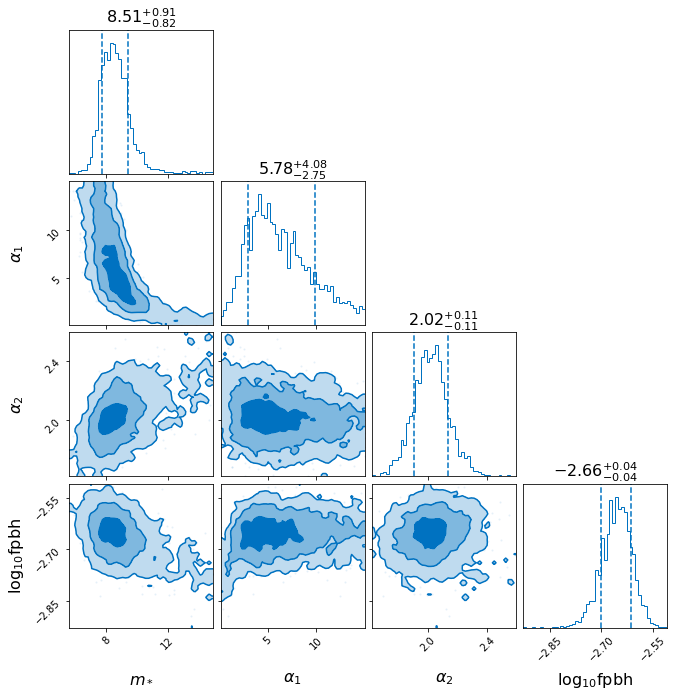

In [6]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()
